In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Ecommerce_Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
df=df.drop(['Email', 'Address','Avatar'], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [29]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


***EDA***

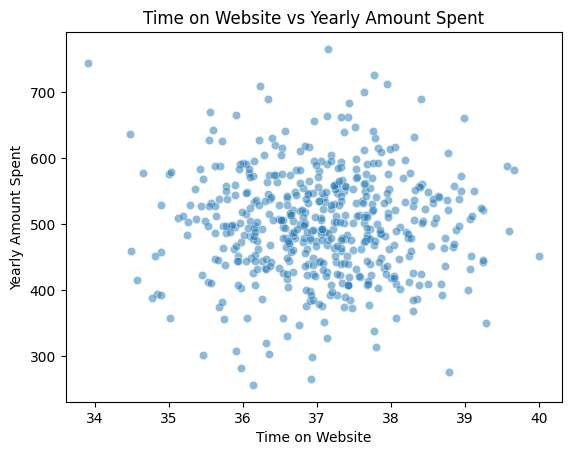

In [30]:
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df,alpha=0.5)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

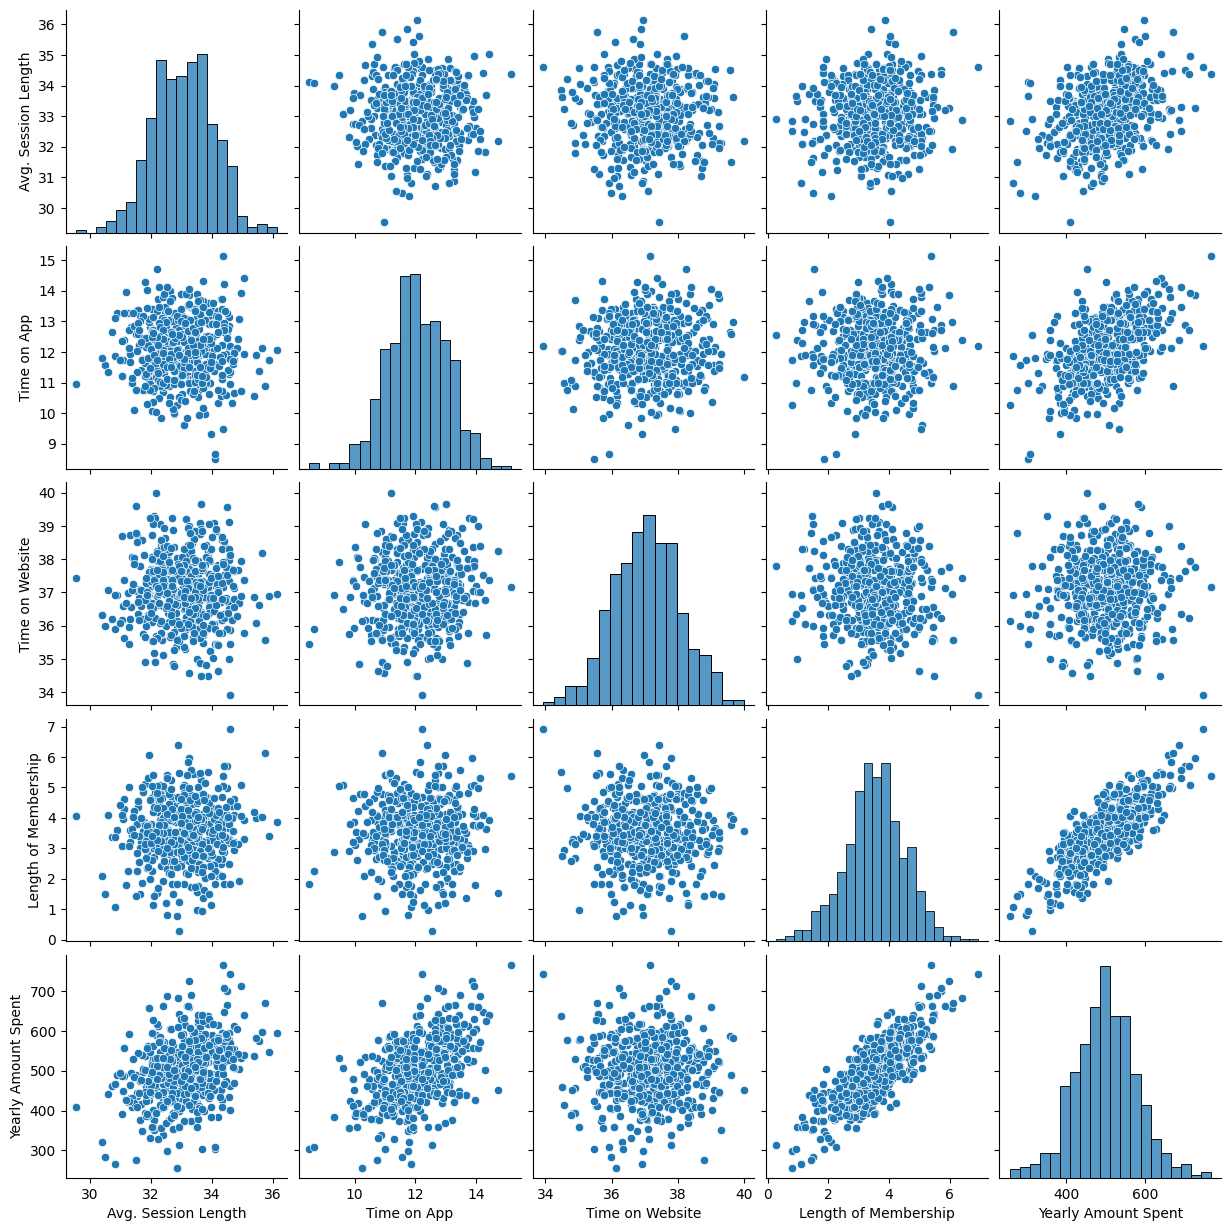

In [31]:
sns.pairplot(df,)

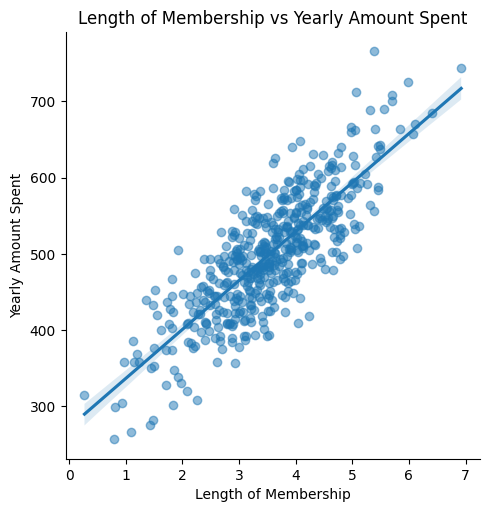

In [32]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=df,scatter_kws={'alpha':0.5})
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]   

In [34]:

X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [35]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()

In [37]:
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
lm.coef_

array([[25.72425621, 38.59713548,  0.45914788, 61.67473243]])

In [39]:
cf=pd.DataFrame(lm.coef_.reshape(-1,1), X.columns, columns=['Coefficient'])
cf

,Coefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [40]:
y_test.shape

(150, 1)

In [41]:
df.shape

(500, 5)

In [42]:
y_pred = lm.predict(X_test)
y_pred[:5]

array([[403.66993069],
       [542.57756289],
       [427.06591658],
       [502.02460425],
       [410.12143559]])

In [43]:
y_pred.shape

(150, 1)

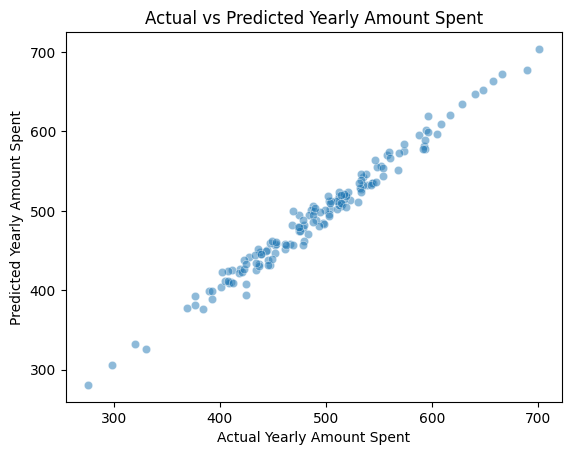

In [44]:
results_df = pd.DataFrame({'Actual': y_test['Yearly Amount Spent'], 'Predicted': y_pred.flatten()}) 

sns.scatterplot(data=results_df, x='Actual', y='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.show()

In [45]:
results_df[:5]

,Actual,Predicted
361,401.033135,403.669931
73,534.777188,542.577563
374,418.602742,427.065917
155,503.978379,502.024604
104,410.069611,410.121436


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 8.43
Mean Squared Error (MSE): 103.92
Root Mean Squared Error (RMSE): 10.19
R-squared (R²): 0.98


<Axes: >

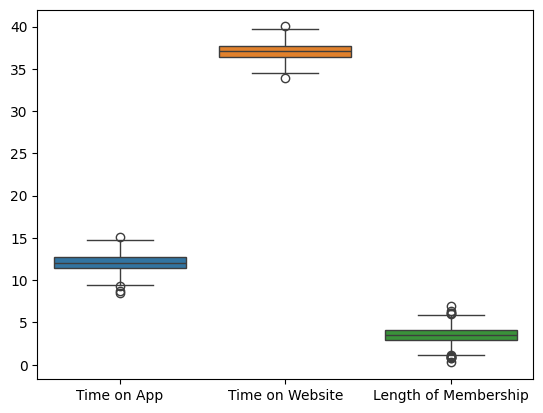

In [47]:
# Boxplot
sns.boxplot(data=df[['Time on App', 'Time on Website', 'Length of Membership']])


<Axes: >

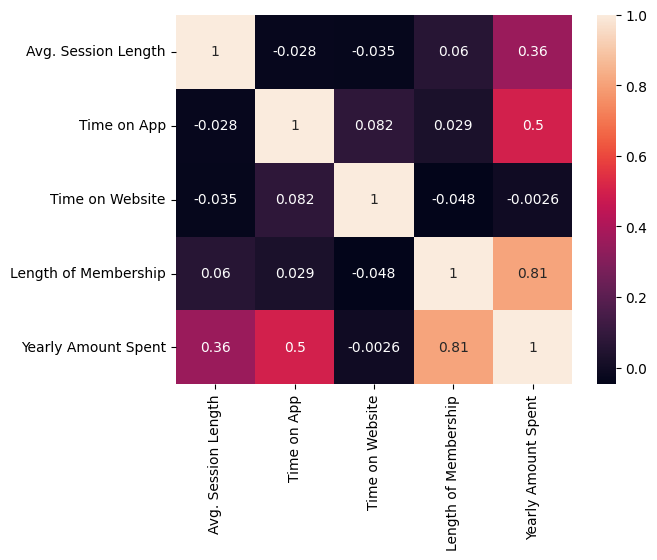

In [48]:
sns.heatmap(df.corr(), annot=True)